In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)

**Data Dictionary**

ID : Unique Customer ID

Gender : Gender of the applicant

DOB : Date of Birth of the applicant

Lead_Creation_Date : Date on which Lead was created

City_Code : Anonymised Code for the City

City_Category: Anonymised City Feature

Employer_Code: Anonymised Code for the Employer

Employer_Category1 : Anonymised Employer Feature

Employer_Category2: Anonymised Employer Feature

Monthly_Income : Monthly Income in Dollars

Customer_Existing_Primary_Bank_Code : Anonymised Customer Bank Code

Primary_Bank_Type: Anonymised Bank Feature

Contacted: Contact Verified (Y/N)

Source : Categorical Variable representing source of lead

Source_Category: Type of Source

Existing_EMI : EMI of Existing Loans in Dollars

Loan_Amount: Loan Amount Requested

Loan_Period: Loan Period (Years)

Interest_Rate: Interest Rate of Submitted Loan Amount

EMI: EMI of Requested Loan Amount in dollars

Var1: Anonymized Categorical variable with multiple levels

Approved: (Target) Whether a loan is Approved or not (1-0) . Customer is Qualified Lead or not (1-0)

In [2]:
leads = pd.read_csv("bank_loan_leads/train_loan/train.csv")

In [3]:
leads.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [5]:
leads.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


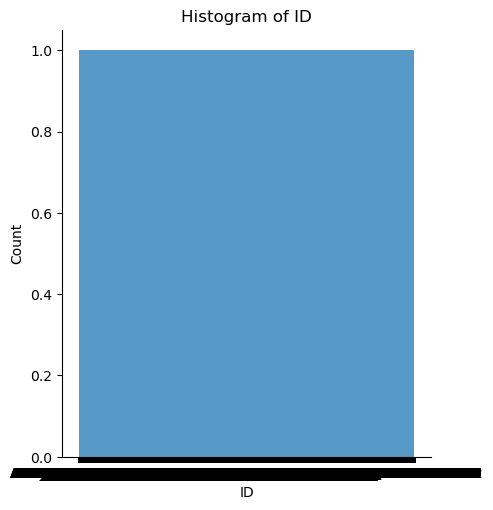

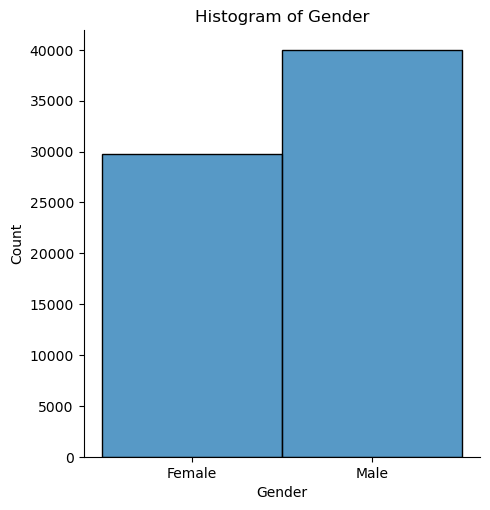

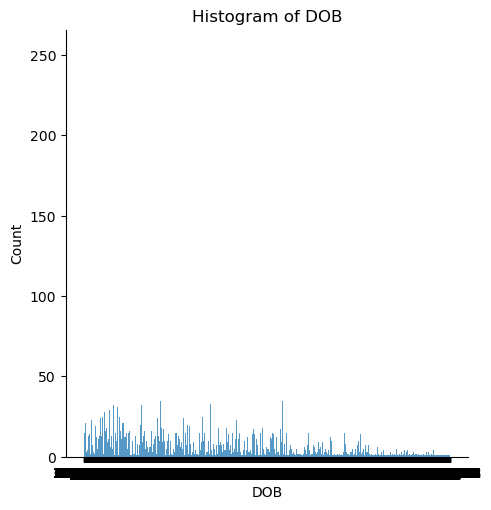

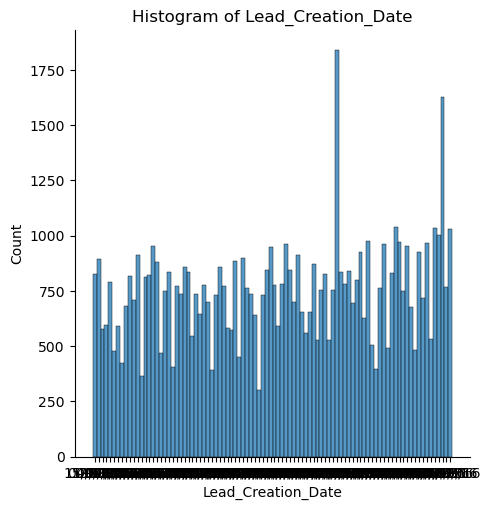

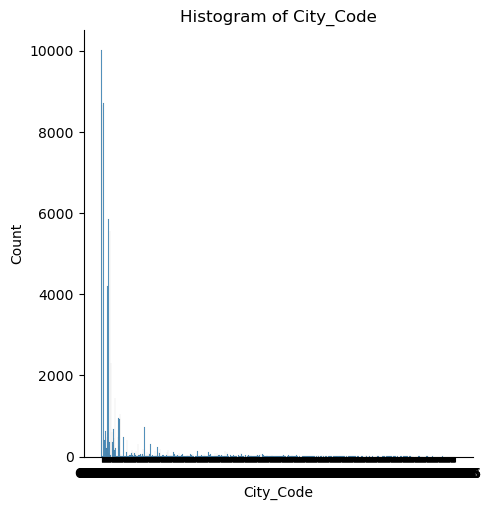

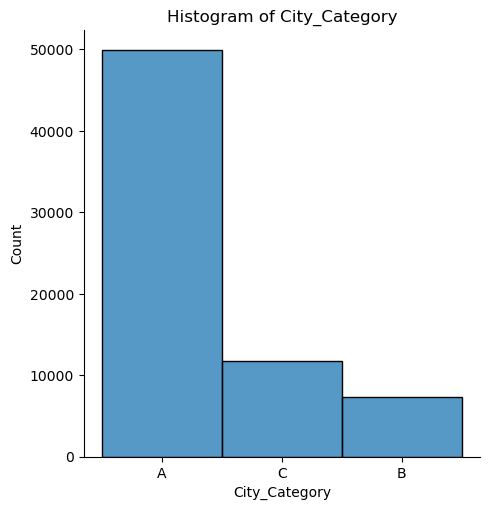

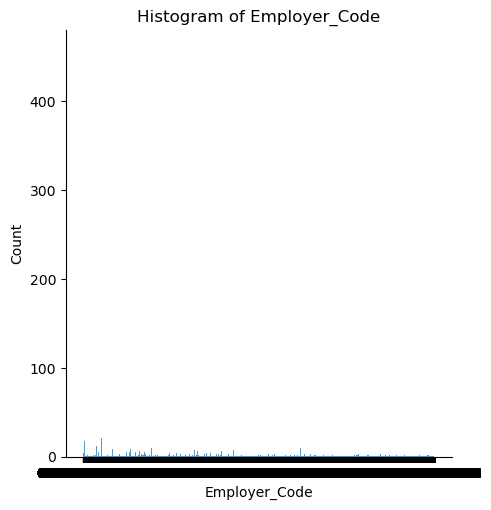

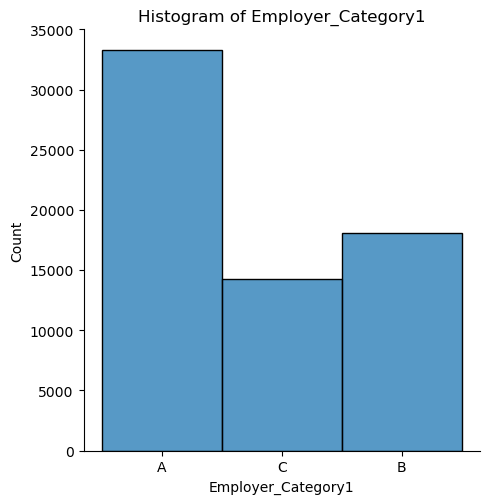

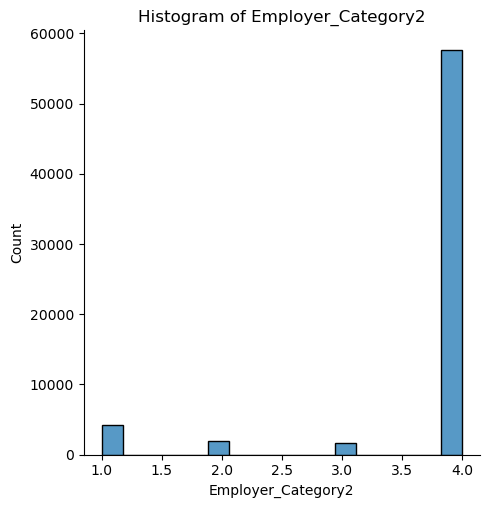

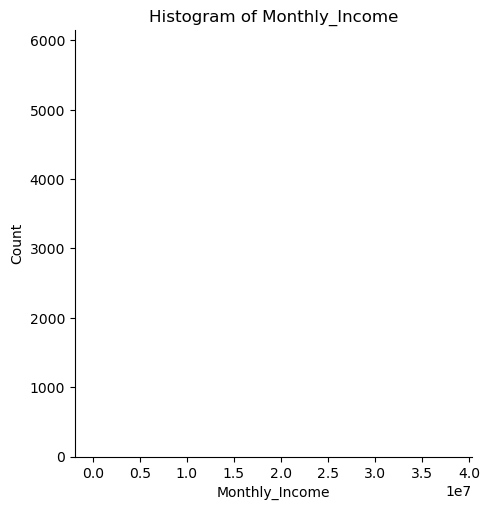

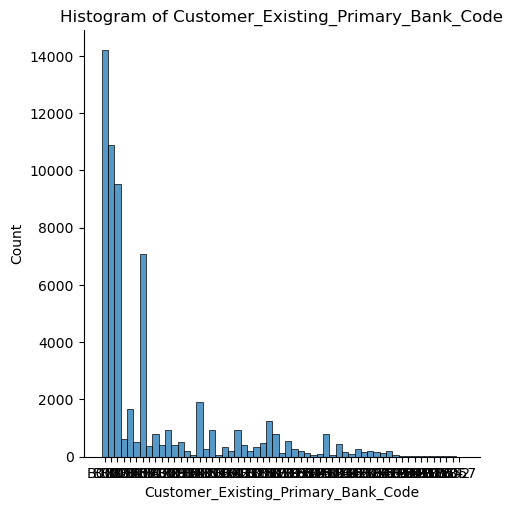

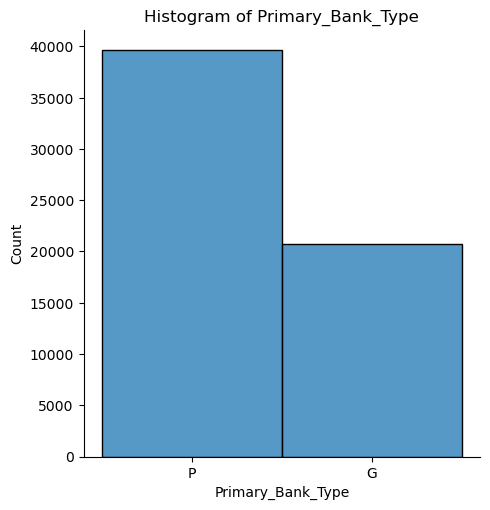

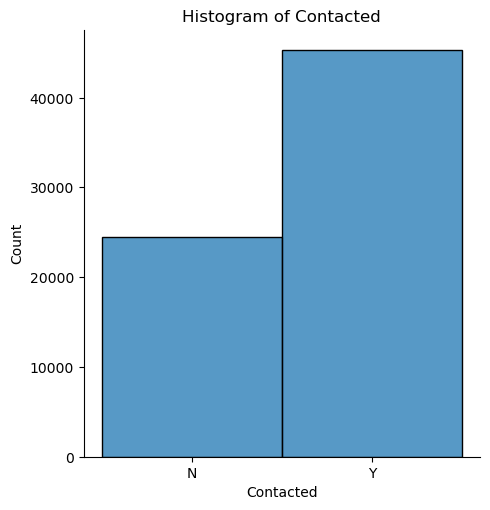

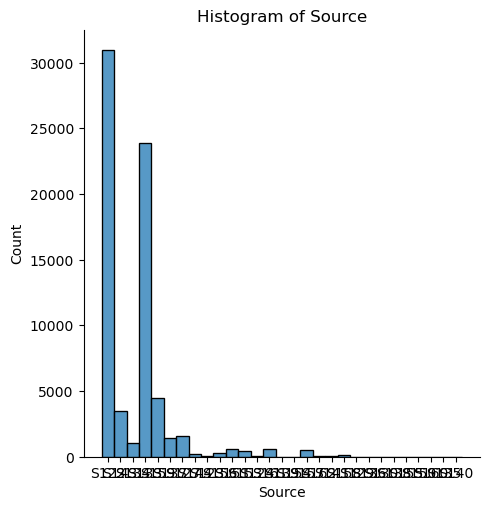

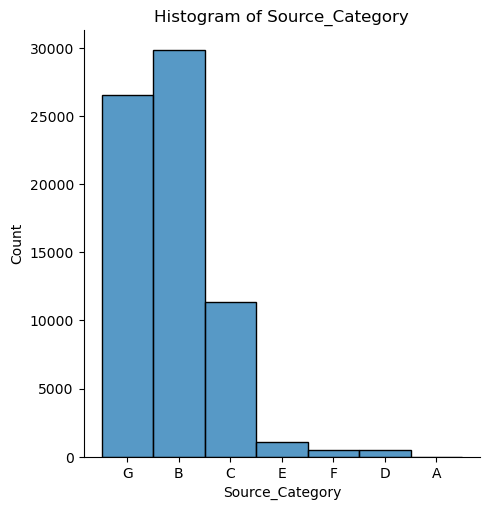

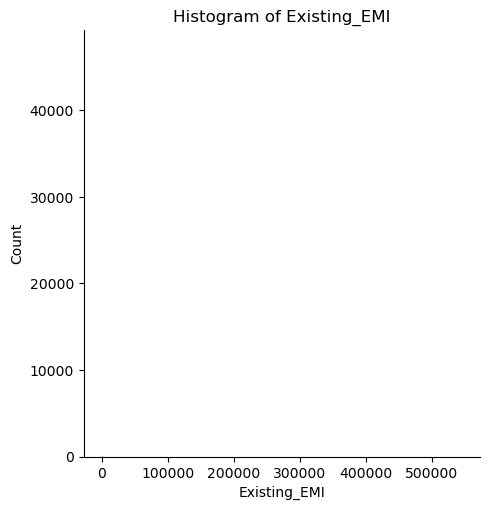

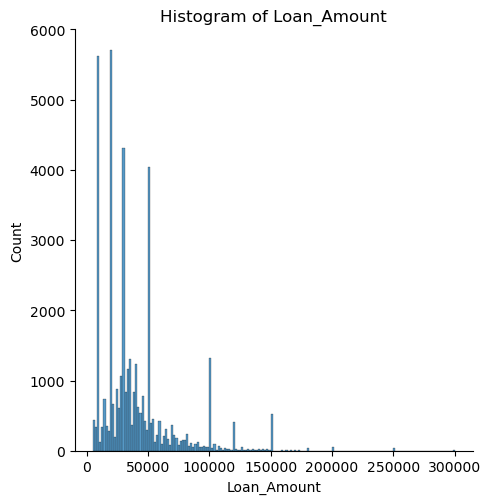

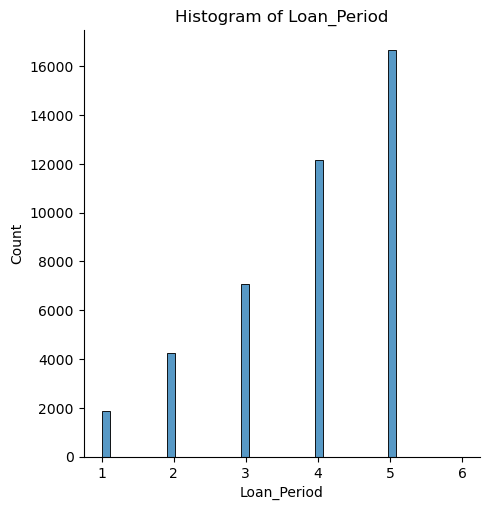

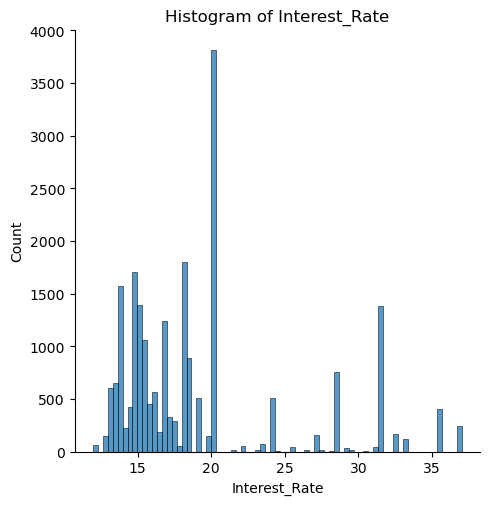

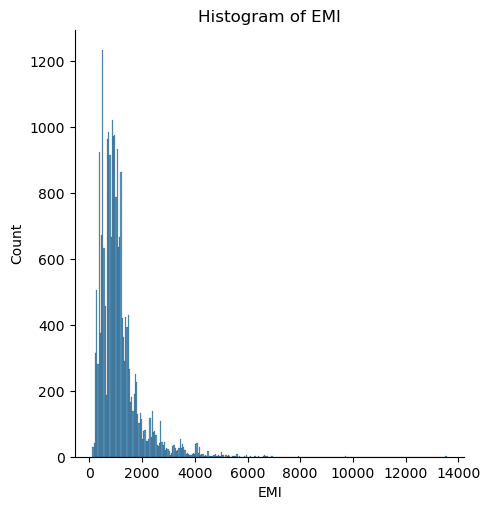

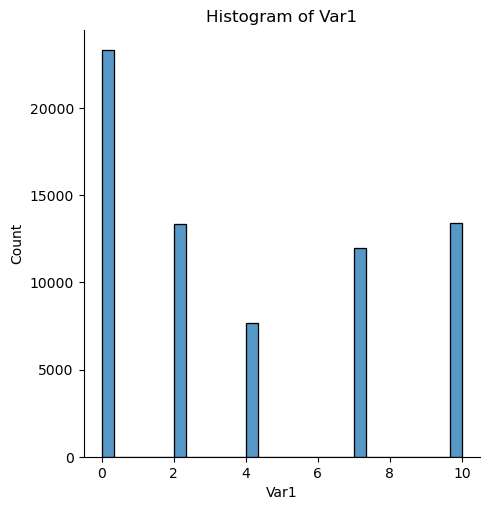

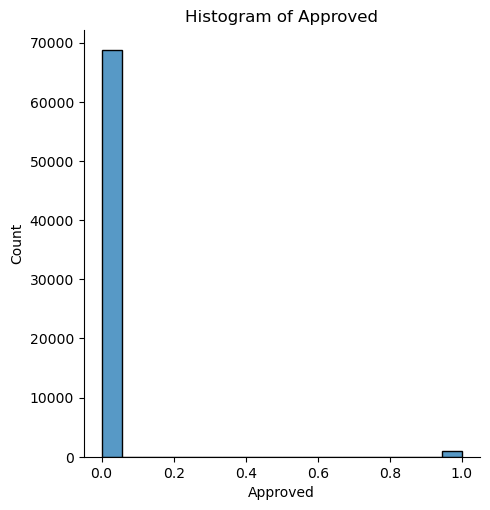

In [67]:
def draw_hists(data, columns):
    for column in columns:
        sns.displot(data, x=column)
        plt.title(f"Histogram of {column}")
        plt.show()
cols = leads.columns
draw_hists(leads, cols)

In [10]:
# sns.pairplot with Approved as hue could be interesting 

In [ ]:
leads_approved = leads[leads['Appoved']==1]
leads_not_approved = leads[leads['Approved'] != 1]

# Data Processing

## Handle missing values

In [11]:
leads.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

### For each column, check how many of the observations with missing values were Approved for a loan

In [12]:
def check_missing_approved(data):
    cols_missing = [col for col in data.columns if data[col].isnull().any()]
    missing_cols_approved = []
    total_missing = []
    vals = []
    percent_missing = []
    for col in cols_missing:
        approved_count = data[data[col].isnull() & (data['Approved'] == 1)].shape[0]
        missing_cols_approved.append(approved_count)
        total_missing_count = data[col].isnull().sum()
        total_missing.append(total_missing_count)
        val_count = data[col].nunique()
        vals.append(val_count)
        pct = np.round((total_missing_count/data[col].shape[0])*100,2)
        percent_missing.append(pct)

    result_table = pd.DataFrame({
        'Column with Missing Data': cols_missing,
        'No. of Unique Values': vals,
        'Total Missing': total_missing,
        'Percentage Missing': percent_missing,
        'Approved Count': missing_cols_approved
        
    })

    return result_table

check_missing_approved(leads)

,Column with Missing Data,No. of Unique Values,Total Missing,Percentage Missing,Approved Count
0,DOB,10759,15,0.02,0
1,City_Code,678,814,1.17,2
2,City_Category,3,814,1.17,2
3,Employer_Code,36617,4018,5.76,5
4,Employer_Category1,3,4018,5.76,5
5,Employer_Category2,4,4298,6.17,13
6,Customer_Existing_Primary_Bank_Code,57,9391,13.47,20
7,Primary_Bank_Type,2,9391,13.47,20
8,Existing_EMI,3245,51,0.07,1
9,Loan_Amount,196,27709,39.75,175


Given that there are so few observations in which Approved==1, this will help us decide if we can afford to delete rows with missing values. 

**DOB** - drop rows with missing

**City_Code** - the rows with City_Code missing have almost all other features missing too and only two are Approved. We can drop these rows

**City_Category** - the missing values will be handled when we delete rows with missing City_Code

**Employer_Code** - drop column, too many categories to be of use

**Empoloyer_Category1** - impute with mode

**Employer_Category2** - impute with mode

**Customer_Existing_Primary_Bank_Code** - we can impute with mode, but I don't think this feature will render much value 

**Primary_Bank_Type** - impute with mode 

**Existing_EMI** - impute with mean, or drop rows

**Loan_Amount** - check distribution, if skewed use median, else mean

**Loan_Period** - impute with median if skewed, else use mean

**Interest_Rate** - drop feature

**EMI** - drop feature 

### Drop Employer_Code, Interest_Rate and EMI from the table 

In [13]:
leads_1 = leads.drop(['Employer_Code', 'Interest_Rate', 'EMI'], axis=1)

### Drop missing value rows from DOB

In [14]:
missing_dob = leads[leads['DOB'].isnull()].index
leads_2 = leads_1.drop(missing_dob, axis=0)


### Impute median values into Loan_Amount and Loan_Period

In [15]:
def impute_median(data, cols):
    for col in cols:
        col_median = data[col].median()
        data[col].fillna(col_median, inplace=True,)
    return data

cols = ['Loan_Amount', 'Loan_Period']
leads_3 = impute_median(leads_2, cols)

In [16]:
leads_3.isnull().sum()

ID                                        0
Gender                                    0
DOB                                       0
Lead_Creation_Date                        0
City_Code                               814
City_Category                           814
Employer_Category1                     4003
Employer_Category2                     4283
Monthly_Income                            0
Customer_Existing_Primary_Bank_Code    9376
Primary_Bank_Type                      9376
Contacted                                 0
Source                                    0
Source_Category                           0
Existing_EMI                             51
Loan_Amount                               0
Loan_Period                               0
Var1                                      0
Approved                                  0
dtype: int64

### 

In [38]:
leads_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69698 entries, 0 to 69712
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69698 non-null  object 
 1   Gender                               69698 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69698 non-null  object 
 4   City_Code                            68884 non-null  object 
 5   City_Category                        68884 non-null  object 
 6   Employer_Category1                   69698 non-null  object 
 7   Employer_Category2                   69698 non-null  float64
 8   Monthly_Income                       69698 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  69698 non-null  object 
 10  Primary_Bank_Type                    69698 non-null  object 
 11  Contacted                        

### Impute mode for Employer_Category1, Employer_Category2, Customer_Existing_Primary_Bank_Code, and Primary_Bank_Type

In [17]:
def impute_mode(data, cols):
    for col in cols:
        col_mode = data[col].mode()[0]
        data[col].fillna(col_mode, inplace=True,)
    return data

cols = ['Employer_Category1', 'Employer_Category2', 'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type']
leads_4 = impute_mode(leads_3, cols)

In [18]:
leads_4.isnull().sum()

ID                                       0
Gender                                   0
DOB                                      0
Lead_Creation_Date                       0
City_Code                              814
City_Category                          814
Employer_Category1                       0
Employer_Category2                       0
Monthly_Income                           0
Customer_Existing_Primary_Bank_Code      0
Primary_Bank_Type                        0
Contacted                                0
Source                                   0
Source_Category                          0
Existing_EMI                            51
Loan_Amount                              0
Loan_Period                              0
Var1                                     0
Approved                                 0
dtype: int64

In [39]:
leads_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69698 entries, 0 to 69712
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69698 non-null  object 
 1   Gender                               69698 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69698 non-null  object 
 4   City_Code                            68884 non-null  object 
 5   City_Category                        68884 non-null  object 
 6   Employer_Category1                   69698 non-null  object 
 7   Employer_Category2                   69698 non-null  float64
 8   Monthly_Income                       69698 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  69698 non-null  object 
 10  Primary_Bank_Type                    69698 non-null  object 
 11  Contacted                        

### Drop rows with missing values in City_Code

In [19]:
missing_city_code = leads[leads['City_Code'].isnull()].index
leads_5 = leads_4.drop(missing_city_code, axis=0)

In [20]:
leads_5.isnull().sum()

ID                                      0
Gender                                  0
DOB                                     0
Lead_Creation_Date                      0
City_Code                               0
City_Category                           0
Employer_Category1                      0
Employer_Category2                      0
Monthly_Income                          0
Customer_Existing_Primary_Bank_Code     0
Primary_Bank_Type                       0
Contacted                               0
Source                                  0
Source_Category                         0
Existing_EMI                           51
Loan_Amount                             0
Loan_Period                             0
Var1                                    0
Approved                                0
dtype: int64

In [40]:
leads_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68884 entries, 0 to 69712
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   68884 non-null  object 
 1   Gender                               68884 non-null  object 
 2   DOB                                  68884 non-null  object 
 3   Lead_Creation_Date                   68884 non-null  object 
 4   City_Code                            68884 non-null  object 
 5   City_Category                        68884 non-null  object 
 6   Employer_Category1                   68884 non-null  object 
 7   Employer_Category2                   68884 non-null  float64
 8   Monthly_Income                       68884 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  68884 non-null  object 
 10  Primary_Bank_Type                    68884 non-null  object 
 11  Contacted                        

### Impute missing Existing_EMI with mean

In [52]:
leads_6 = leads_5.copy()
emi_mean = leads_6['Existing_EMI'].mean()
leads_6['Existing_EMI'].fillna(emi_mean, inplace=True)

In [53]:
leads_6.isnull().sum()

ID                                     0
Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Var1                                   0
Approved                               0
dtype: int64

In [54]:
leads_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68884 entries, 0 to 69712
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   68884 non-null  object 
 1   Gender                               68884 non-null  object 
 2   DOB                                  68884 non-null  object 
 3   Lead_Creation_Date                   68884 non-null  object 
 4   City_Code                            68884 non-null  object 
 5   City_Category                        68884 non-null  object 
 6   Employer_Category1                   68884 non-null  object 
 7   Employer_Category2                   68884 non-null  float64
 8   Monthly_Income                       68884 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  68884 non-null  object 
 10  Primary_Bank_Type                    68884 non-null  object 
 11  Contacted                        

In [55]:
leads_6.drop('ID', axis=1, inplace=True)

In [56]:
leads_6.isnull().sum()

Gender                                 0
DOB                                    0
Lead_Creation_Date                     0
City_Code                              0
City_Category                          0
Employer_Category1                     0
Employer_Category2                     0
Monthly_Income                         0
Customer_Existing_Primary_Bank_Code    0
Primary_Bank_Type                      0
Contacted                              0
Source                                 0
Source_Category                        0
Existing_EMI                           0
Loan_Amount                            0
Loan_Period                            0
Var1                                   0
Approved                               0
dtype: int64

## Fix datatypes

In [57]:
leads_6.head(5)

,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Var1,Approved
0,Female,23/07/79,15/07/16,C10001,A,A,4.0,2000.0,B001,P,N,S122,G,0.0,30000.0,4.0,0,0
1,Male,07/12/86,04/07/16,C10003,A,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,10,0
2,Male,10/12/82,19/07/16,C10125,C,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,0,0
3,Male,30/01/89,09/07/16,C10477,C,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,7,0
4,Male,19/04/85,20/07/16,C10002,A,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,10,0


In [61]:
leads_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68884 entries, 0 to 69712
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               68884 non-null  object 
 1   DOB                                  68884 non-null  object 
 2   Lead_Creation_Date                   68884 non-null  object 
 3   City_Code                            68884 non-null  object 
 4   City_Category                        68884 non-null  object 
 5   Employer_Category1                   68884 non-null  object 
 6   Employer_Category2                   68884 non-null  float64
 7   Monthly_Income                       68884 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  68884 non-null  object 
 9   Primary_Bank_Type                    68884 non-null  object 
 10  Contacted                            68884 non-null  object 
 11  Source                           

In [59]:
# Check each column for multiple datatypes: 
def check_dtypes_per_col(data):
    for col in data:
        unique_dtypes = data[col].apply(type).unique()
        print(f"{col} datatypes: ", unique_dtypes)

check_dtypes_per_col(leads_6)

Gender datatypes:  [<class 'str'>]
DOB datatypes:  [<class 'str'>]
Lead_Creation_Date datatypes:  [<class 'str'>]
City_Code datatypes:  [<class 'str'>]
City_Category datatypes:  [<class 'str'>]
Employer_Category1 datatypes:  [<class 'str'>]
Employer_Category2 datatypes:  [<class 'float'>]
Monthly_Income datatypes:  [<class 'float'>]
Customer_Existing_Primary_Bank_Code datatypes:  [<class 'str'>]
Primary_Bank_Type datatypes:  [<class 'str'>]
Contacted datatypes:  [<class 'str'>]
Source datatypes:  [<class 'str'>]
Source_Category datatypes:  [<class 'str'>]
Existing_EMI datatypes:  [<class 'float'>]
Loan_Amount datatypes:  [<class 'float'>]
Loan_Period datatypes:  [<class 'float'>]
Var1 datatypes:  [<class 'int'>]
Approved datatypes:  [<class 'int'>]


In [62]:
leads_7 = leads_6.copy()
leads_7['DOB'] = pd.to_datetime(leads_7['DOB'], format="%d/%m/%y")

In [63]:
leads_7['Lead_Creation_Date'] = pd.to_datetime(leads_7['Lead_Creation_Date'], format="%d/%m/%y")

In [64]:
leads_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68884 entries, 0 to 69712
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Gender                               68884 non-null  object        
 1   DOB                                  68884 non-null  datetime64[ns]
 2   Lead_Creation_Date                   68884 non-null  datetime64[ns]
 3   City_Code                            68884 non-null  object        
 4   City_Category                        68884 non-null  object        
 5   Employer_Category1                   68884 non-null  object        
 6   Employer_Category2                   68884 non-null  float64       
 7   Monthly_Income                       68884 non-null  float64       
 8   Customer_Existing_Primary_Bank_Code  68884 non-null  object        
 9   Primary_Bank_Type                    68884 non-null  object        
 10  Contacted      

## Handle anomalies and outliers

In [30]:
# Monthly_Income and Existing_EMI have outliers that look like they have been entered incorrectly. 

In [65]:
leads_7.describe()

,DOB,Lead_Creation_Date,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Var1,Approved
count,68884,68884,68884.000000,6.888400e+04,68884.000000,68884.000000,68884.000000,68884.000000,68884.000000
mean,1989-07-26 14:30:13.274490624,2016-08-17 12:46:48.338656512,3.735831,5.644442e+03,359.211154,35750.203240,3.933308,3.995964,0.014778
min,1969-01-01 00:00:00,2016-07-01 00:00:00,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,0.000000,0.000000
25%,1983-10-07 00:00:00,2016-07-25 00:00:00,4.000000,1.648600e+03,0.000000,29000.000000,4.000000,0.000000,0.000000
50%,1987-11-10 00:00:00,2016-08-19 00:00:00,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,2.000000,0.000000
75%,1991-01-27 00:00:00,2016-09-09 00:00:00,4.000000,4.000000e+03,350.000000,36000.000000,4.000000,7.000000,0.000000
max,2068-12-28 00:00:00,2016-09-30 00:00:00,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,10.000000,1.000000
std,NaN,NaN,0.787018,1.758148e+05,2297.518854,24431.506112,0.913230,3.817336,0.120666


In [66]:
leads_7.sort_values(by=["Existing_EMI"], axis=0, ascending=False)

,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Var1,Approved
20442,Male,1976-05-13,2016-07-29,C10001,A,A,4.0,12010013.2,B003,G,Y,S153,B,545436.5,50000.0,5.0,10,0
38031,Male,1986-04-04,2016-08-23,C10001,A,A,4.0,562626.6,B002,P,Y,S122,B,62626.6,30000.0,2.0,10,0
14828,Female,1983-01-21,2016-07-22,C10002,A,A,4.0,70000.0,B001,P,N,S133,B,42000.0,30000.0,4.0,0,0
14827,Female,1983-01-21,2016-07-22,C10002,A,A,4.0,70000.0,B001,P,N,S133,B,42000.0,30000.0,4.0,0,0
26628,Female,1973-03-30,2016-08-08,C10001,A,C,4.0,60000.0,B002,P,N,S143,B,30000.0,30000.0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27901,Male,1990-10-04,2016-08-09,C10010,A,C,4.0,3800.0,B001,P,Y,S133,B,0.0,20000.0,2.0,10,0
27903,Male,2063-06-10,2016-08-09,C10007,A,A,4.0,5000.0,B001,P,Y,S133,B,0.0,20000.0,5.0,10,0
27904,Male,1991-11-14,2016-08-09,C10004,A,B,3.0,2500.0,B001,P,Y,S133,C,0.0,43000.0,5.0,4,0
27905,Female,1992-09-15,2016-08-09,C10012,A,C,4.0,1000.0,B002,P,N,S133,B,0.0,30000.0,4.0,0,0


In [67]:
leads_8 = leads_7.drop(20442, axis=0)

In [68]:
quantiles = leads_8['Monthly_Income'].quantile([0.25, 0.5, 0.75])
print(quantiles)

0.25    1648.4
0.50    2500.0
0.75    4000.0
Name: Monthly_Income, dtype: float64


In [69]:
over_100 = leads_8[leads_8['Monthly_Income'] > 100000]

# Feature Engineering

## Create Age feature from DOB

## Remove Contacted==0 if Contacted==0 does not contain Approved==1

## Encode categorical features

# Multivariate Analysis

In [ ]:
leads.info()

In [ ]:
leads.describe().T

In [ ]:
sns.pairplot(leads)


# Univariate analysis



In [ ]:
# dob_dt = pd.to_datetime(leads['DOB'], format="%d/%m/%y")
# leads['DOB'] = dob_dt

# def age(births):
#     current_year = datetime.today().year
#     ages=[]
#     for x in births:
#         birth_year = datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").year
#         ages.append(current_year - birth_year)
#     return ages
# print(age(leads['DOB']))
